<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,37.011411,78.978927,57.974111,42.137589,-0.013913,226.088125,226.097704,-0.009579
1,0.0,1.0,21.426682,89.793169,46.972999,38.542171,-0.000582,206.734439,206.724576,0.009863
2,0.0,2.0,40.375754,32.314315,28.475259,26.128008,0.028236,137.321572,137.304663,0.016909
3,0.0,3.0,30.024397,22.329234,88.224097,84.521558,0.015433,235.114720,235.120844,-0.006125
4,0.0,4.0,28.908791,71.661207,26.624245,97.109598,0.007987,234.311828,234.305213,0.006615
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.226282,59.182907,36.775694,74.020761,-0.012147,234.193497,234.209532,-0.016035
19996,999.0,16.0,23.130222,89.103943,67.353085,59.267373,-0.013292,248.841332,248.852074,-0.010742
19997,999.0,17.0,62.008813,53.199850,86.704236,60.825116,0.004751,272.742767,272.739910,0.002857
19998,999.0,18.0,73.916555,98.926659,25.974069,81.255823,-0.011825,290.061280,290.067904,-0.006624


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    37.011411  78.978927  57.974111  42.137589 -0.013913  226.088125   
      1.0    21.426682  89.793169  46.972999  38.542171 -0.000582  206.734439   
      2.0    40.375754  32.314315  28.475259  26.128008  0.028236  137.321572   
      3.0    30.024397  22.329234  88.224097  84.521558  0.015433  235.114720   
      4.0    28.908791  71.661207  26.624245  97.109598  0.007987  234.311828   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   54.226282  59.182907  36.775694  74.020761 -0.012147  234.193497   
      16.0   23.130222  89.103943  67.353085  59.267373 -0.013292  248.841332   
      17.0   62.008813  53.199850  86.704236  60.825116  0.004751  272.742767   
      18.0   73.916555  98.926659  25.974069  81.255823 -0.011825  290.061280   
      19.0   69.047333  86.103536  31.976722  53.314022  0.002234  250.443848   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.097704 -0.009579  
      1.0    206.724576  0.009863  
      2.0    137.304663  0.016909  
      3.0    235.120844 -0.006125  
      4.0    234.305213  0.006615  
...                 ...       ...  
999.0 15.0   234.209532 -0.016035  
      16.0   248.852074 -0.010742  
      17.0   272.739910  0.002857  
      18.0   290.067904 -0.006624  
      19.0   250.435512  0.008336  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    37.011411  78.978927  57.974111  42.137589 -0.013913  226.088125   
      1.0    21.426682  89.793169  46.972999  38.542171 -0.000582  206.734439   
      2.0    40.375754  32.314315  28.475259  26.128008  0.028236  137.321572   
      3.0    30.024397  22.329234  88.224097  84.521558  0.015433  235.114720   
      4.0    28.908791  71.661207  26.624245  97.109598  0.007987  234.311828   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   54.226282  59.182907  36.775694  74.020761 -0.012147  234.193497   
      16.0   23.130222  89.103943  67.353085  59.267373 -0.013292  248.841332   
      17.0   62.008813  53.199850  86.704236  60.825116  0.004751  272.742767   
      18.0   73.916555  98.926659  25.974069  81.255823 -0.011825  290.061280   
      19.0   69.047333  86.103536  31.976722  53.314022  0.002234  250.443848   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.097704 -0.009579  
      1.0    206.724576  0.009863  
      2.0    137.304663  0.016909  
      3.0    235.120844 -0.006125  
      4.0    234.305213  0.006615  
...                 ...       ...  
999.0 15.0   234.209532 -0.016035  
      16.0   248.852074 -0.010742  
      17.0   272.739910  0.002857  
      18.0   290.067904 -0.006624  
      19.0   250.435512  0.008336  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,37.011411,78.978927,57.974111,42.137589,-0.013913,226.088125,226.097704,-0.009579
1,0.0,1.0,21.426682,89.793169,46.972999,38.542171,-0.000582,206.734439,206.724576,0.009863
2,0.0,2.0,40.375754,32.314315,28.475259,26.128008,0.028236,137.321572,137.304663,0.016909
3,0.0,3.0,30.024397,22.329234,88.224097,84.521558,0.015433,235.114720,235.120844,-0.006125
4,0.0,4.0,28.908791,71.661207,26.624245,97.109598,0.007987,234.311828,234.305213,0.006615
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.226282,59.182907,36.775694,74.020761,-0.012147,234.193497,234.209532,-0.016035
19996,999.0,16.0,23.130222,89.103943,67.353085,59.267373,-0.013292,248.841332,248.852074,-0.010742
19997,999.0,17.0,62.008813,53.199850,86.704236,60.825116,0.004751,272.742767,272.739910,0.002857
19998,999.0,18.0,73.916555,98.926659,25.974069,81.255823,-0.011825,290.061280,290.067904,-0.006624


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    37.011411  78.978927  57.974111  42.137589 -0.013913  226.088125   
      1.0    21.426682  89.793169  46.972999  38.542171 -0.000582  206.734439   
      2.0    40.375754  32.314315  28.475259  26.128008  0.028236  137.321572   
      3.0    30.024397  22.329234  88.224097  84.521558  0.015433  235.114720   
      4.0    28.908791  71.661207  26.624245  97.109598  0.007987  234.311828   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   54.226282  59.182907  36.775694  74.020761 -0.012147  234.193497   
      16.0   23.130222  89.103943  67.353085  59.267373 -0.013292  248.841332   
      17.0   62.008813  53.199850  86.704236  60.825116  0.004751  272.742767   
      18.0   73.916555  98.926659  25.974069  81.255823 -0.011825  290.061280   
      19.0   69.047333  86.103536  31.976722  53.314022  0.002234  250.443848   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.097704 -0.009579  
      1.0    206.724576  0.009863  
      2.0    137.304663  0.016909  
      3.0    235.120844 -0.006125  
      4.0    234.305213  0.006615  
...                 ...       ...  
999.0 15.0   234.209532 -0.016035  
      16.0   248.852074 -0.010742  
      17.0   272.739910  0.002857  
      18.0   290.067904 -0.006624  
      19.0   250.435512  0.008336  

[20000 rows x 8 columns]

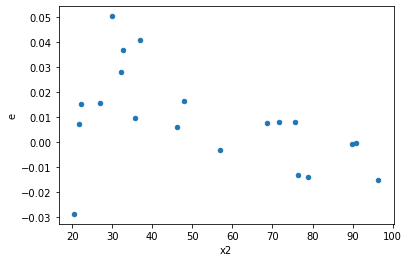

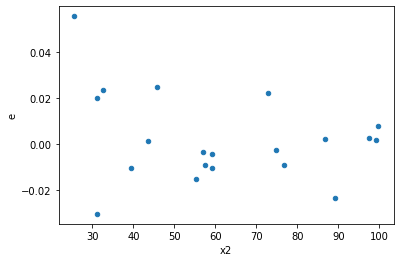

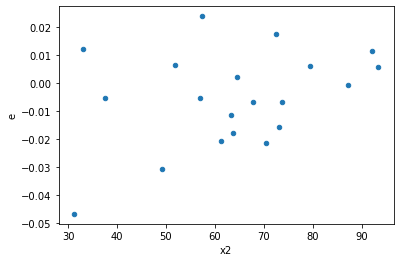

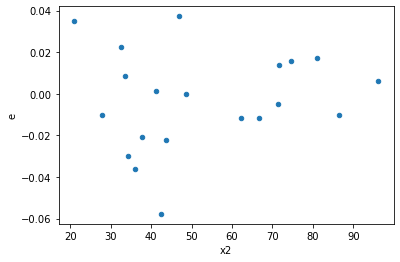

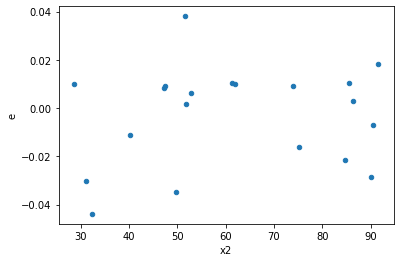

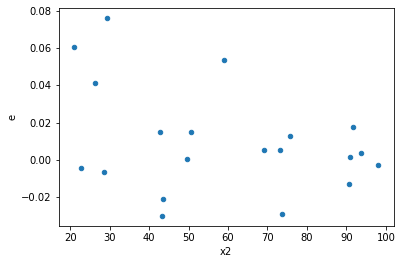

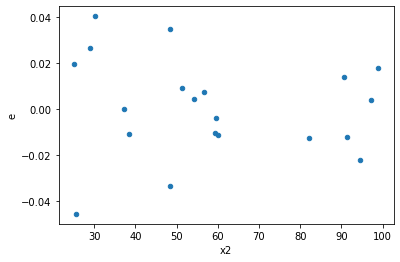

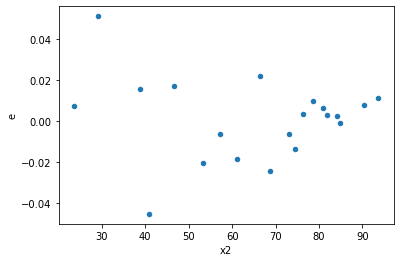

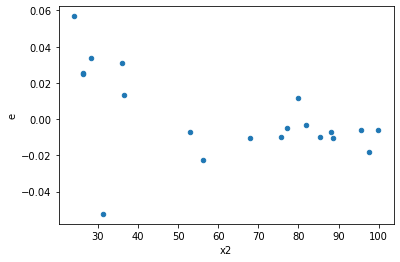

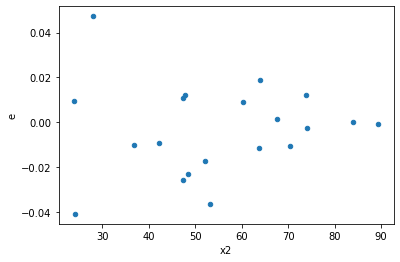

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,8.0,0.0005324712176954973,0.003467280948573815,0.00013311780442387433,0.0004334101185717269,3.2558388447548334,0.14584677285332415,0.9270766135733379,0.07292338642666207,Reject005=1 : Homoscedasticity
2.0,3.0,9.0,0.00020576543611036658,0.0011475188116777278,6.858847870345553e-05,0.0001275020901864142,1.8589432598100557,0.4138572349392162,0.7930713825303919,0.2069286174696081,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.00042525363978016244,0.0028549441732614814,7.087560663002707e-05,0.00047582402887691357,6.713509083043623,0.03554365158920603,0.982228174205397,0.017771825794603013,Reject005=0 : Heteroscedasticity
9.0,8.0,4.0,0.0013125299156000613,0.0036149275290817103,0.00016406623945000766,0.0009037318822704276,5.508335446097686,0.1168586704732879,0.941570664763356,0.05842933523664395,Reject005=1 : Homoscedasticity
12.0,8.0,4.0,0.0008577216732158593,0.002200339293670993,0.00010721520915198242,0.0005500848234177482,5.130660358438307,0.13151968936952496,0.9342401553152375,0.06575984468476248,Reject005=1 : Homoscedasticity
14.0,1.0,12.0,3.069615554396001e-26,0.0039790934857296305,3.069615554396001e-26,0.00033159112381080254,1.080236654834285e+22,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
15.0,5.0,7.0,0.0005378501168711,0.0010725577929009901,0.00010757002337422,0.0001532225418429986,1.4243981458473827,0.6458684166142714,0.6770657916928643,0.3229342083071357,Reject005=1 : Homoscedasticity
18.0,1.0,11.0,4.362085261510107e-26,0.013389547398766513,4.362085261510107e-26,0.0012172315817060467,2.7904809482899794e+22,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
19.0,4.0,8.0,0.001205366229366196,0.006289828717791988,0.000301341557341549,0.0007862285897239985,2.6090944662931603,0.23146096418139783,0.8842695179093011,0.11573048209069892,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,8.0,0.0005324712176954973,0.003467280948573815,0.00013311780442387433,0.0004334101185717269,3.2558388447548334,0.14584677285332415,Reject005=1 : Homoscedasticity
1.0,13.0,1.0,0.005381721721609193,3.4331226595218434e-27,0.00041397859396993797,3.4331226595218434e-27,8.292995602983153e-24,7.078004938529782e-144,Reject005=0 : Heteroscedasticity
2.0,3.0,9.0,0.00020576543611036658,0.0011475188116777278,6.858847870345553e-05,0.0001275020901864142,1.8589432598100557,0.4138572349392162,Reject005=1 : Homoscedasticity
3.0,7.0,5.0,0.004821449900758883,0.0021225314702825295,0.0006887785572512689,0.0004245062940565059,0.6163175226455901,0.5403977887745581,Reject005=1 : Homoscedasticity
4.0,7.0,5.0,0.003491810157086707,0.0005433423885861062,0.0004988300224409582,0.00010866847771722123,0.2178467069513309,0.07095984515445021,Reject005=1 : Homoscedasticity
5.0,8.0,4.0,0.01002215202315536,0.0009343973790991189,0.00125276900289442,0.00023359934477477971,0.186466414985578,0.04261057781917427,Reject005=0 : Heteroscedasticity
6.0,10.0,2.0,0.005091009529017499,0.00036698486549579205,0.0005091009529017499,0.00018349243274789603,0.36042445354312225,0.22004720364909663,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.00042525363978016244,0.0028549441732614814,7.087560663002707e-05,0.00047582402887691357,6.713509083043623,0.03554365158920603,Reject005=0 : Heteroscedasticity
8.0,7.0,5.0,0.003245826950861688,9.349191703303068e-05,0.00046368956440881253,1.8698383406606136e-05,0.04032521937483303,0.0005137828935252777,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      665
Reject005=0 : Heteroscedasticity    335
Name: Result_test, dtype: int64